# PRE-PROCESSING FOR MACHINE LEARNING
01. Understanding the data
02. Handle the Missing Data
03. Initial Outliers Check
04. Encoding Categorical Variables
05. Feature Scaling
06. Final Outliers Check (Optional)
07. PCA and LDA (Optional)
08. Date and Time Feature Engineering
09. Exploratory Data Analysis
10. Feature Engineering
11. Feature Selection
12. Data Imbalance
13. Splitting the Data

In [3]:
# Complete pandas and numpy is required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Understanding the data
    - df.info(), df.describe(), df.head(), df.dtype
    - unique values for each columns, inconsistent values handling
    - check for data leakage
    - removing duplicates
    - target distribution (for classification: value_counts, for regression: histogram)

In [3]:
df = pd.read_csv('titanic.csv')

#### 1

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2

In [7]:
df_object = df.select_dtypes(include=['object'])

In [8]:
lis = df_object.columns

In [9]:
list(lis)

['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']

In [10]:
for i in lis:
    print(df[i].unique())

['male' 'female']
['S' 'C' 'Q' nan]
['Third' 'First' 'Second']
['man' 'woman' 'child']
[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']
['Southampton' 'Cherbourg' 'Queenstown' nan]
['no' 'yes']


#### 3. 
Survived == Alive

In [11]:
df = df.drop('alive', axis=1)

## 4

### 5

In [12]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

## 2. Handling the Missing Values
    - remove the rows : if they are very less
    - fill with default values: for example null cities with 'Unkown'
    - Imputing the data: mean, median, mode, frontfill, backfill
    - Generating Values : Using KNNImpute, IterativeImputer

In [13]:
df = pd.read_csv('AmesHousing.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [19]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [48]:
cols = []
for i in df.columns:
    if df[i].isnull().sum() > 0:
        cols.append([i, df[i].isnull().sum()])
cols

[['Lot Frontage', 490],
 ['Alley', 2732],
 ['Mas Vnr Type', 1775],
 ['Mas Vnr Area', 23],
 ['Bsmt Qual', 80],
 ['Bsmt Cond', 80],
 ['Bsmt Exposure', 83],
 ['BsmtFin Type 1', 80],
 ['BsmtFin SF 1', 1],
 ['BsmtFin Type 2', 81],
 ['BsmtFin SF 2', 1],
 ['Bsmt Unf SF', 1],
 ['Total Bsmt SF', 1],
 ['Electrical', 1],
 ['Bsmt Full Bath', 2],
 ['Bsmt Half Bath', 2],
 ['Fireplace Qu', 1422],
 ['Garage Type', 157],
 ['Garage Yr Blt', 159],
 ['Garage Finish', 159],
 ['Garage Cars', 1],
 ['Garage Area', 1],
 ['Garage Qual', 159],
 ['Garage Cond', 159],
 ['Pool QC', 2917],
 ['Fence', 2358],
 ['Misc Feature', 2824]]

#### 1 : Deleting the null <br><br>
The columns like *Alley*, *Pool QC*, *Fence*, *Misc Feature* are having more than 90% of null values.<br>
How to deal and what to drop ?<br>

1. Dropping rows:<br>
       if null values are less, for example *'BsmtFin SF 1'* has missing value in only one row
2. Dropping columns:<br>
       if null values are more, for example *Alley* has 198 values in its column, so we can drop it completely [but not recommended]

<big><b>*Note: Dropping rows and columns is never recommended without thorough check of data.*</b></big>

deleting columns

In [49]:
df = df.drop('Pool QC',axis=1)

In [50]:
df = df.drop('Misc Feature', axis=1)

deleting rows

In [51]:
df.dropna(subset=['Bsmt Unf SF'], inplace = True)

In [52]:
df.dropna(subset=['Bsmt Full Bath'], inplace=True)

We will do other methods on remaining data

#### 2 : Filling by default values

In [53]:
df['Alley'] = df['Alley'].fillna('No Alley')

In [54]:
df['Fence'] = df['Fence'].fillna('No Fence')

#### 3 : Imputing Data
The operations are done separately to keep track how much lines we are deleting<br>
Generally 5% rows are okay.<br>
We also have to check the number of data missing in rows.<br>
If in a row more than 30% features are missing then we can go for deletion, otherwise imputation

How to deal ? <br>
1. Mean: normally distributed, continuous value, no extremes/outliers ... bell shape graph, 
2. Median: not normally distributed, continuous value, have extremes/outliers
3. Mode: Discrete values or categorical values, okay with extremens/outliers
4. Ffill and bfill: For time-series data, for ex. stock rates

<Axes: xlabel='Lot Frontage', ylabel='Count'>

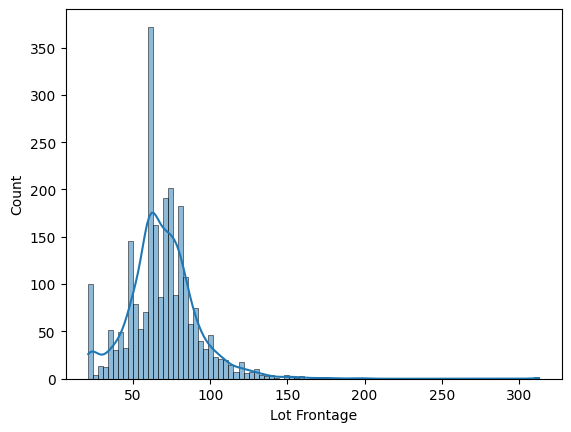

In [55]:
sns.histplot(df['Lot Frontage'] , kde=True)

In [14]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [57]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())

In [58]:
# this is wrong method to do so, correct is filling default 'No' value
df['Mas Vnr Type'] = df['Mas Vnr Type'].ffill()

In [59]:
# fill with 0, since type was not mentioned
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [60]:
'''Alternative way for :
   cols = []
   for i in df.columns:
      if df[i].isnull().sum() > 0:
          cols.append([i, df[i].isnull().sum()])|
    cols
'''

df.isnull().sum()[df.isnull().sum() > 0]

Bsmt Qual           78
Bsmt Cond           78
Bsmt Exposure       81
BsmtFin Type 1      78
BsmtFin Type 2      79
Fireplace Qu      1421
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
dtype: int64

In [61]:
df['Bsmt Qual'] = df['Bsmt Qual'].fillna('No')
df['Bsmt Cond'] = df['Bsmt Cond'].fillna('No')
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('No')
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna('No')
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna('No')

In [62]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('No')

In [63]:
df['Garage Type'].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', nan, 'CarPort', '2Types'],
      dtype=object)

In [64]:
df[df['Garage Cars'].isnull()][['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Area,Garage Qual,Garage Cond
2236,Detchd,NaN,NaN,NaN,NaN,NaN


In [65]:
df.dropna(subset=['Garage Cars'], inplace = True)

In [66]:
df['Garage Type'] = df['Garage Type'].fillna('No')

In [67]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [68]:
df['Garage Finish'] = df['Garage Finish'].fillna(0)

In [69]:
df['Garage Area'] = df['Garage Area'].fillna(0)

In [70]:
df['Garage Qual'] = df['Garage Qual'].fillna(df['Garage Qual'].mode()[0])

In [71]:
df['Garage Cond'] = df['Garage Cond'].fillna(df['Garage Cond'].mode()[0])

#### 4: Generating values
1. KNN Imputer: Interdependent data, needs standar scaling, slow, not for categorical
2. IterativeImputer: Complex relation with other features, not for categorical

*Avoid it mostly*

## 3. Initial Outliers Check

    - IQR : numeric, single column at a time
    - Robust Z-score : numeric, small dataset, non-normal distribution
    - log1p + RobustScaler : rightly skewed data, no normal distribution, no negative or zero value
    - Isolation Forest : high dimentional data 
    - Winsorization: retain data rows, replace extreme value by upper or lower limit
    - Yeo-Johnson : 

check for outliers in all numeric data first, then decide which method to use

In [12]:
df = pd.read_csv('BostonHousingData.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [14]:
df.select_dtypes(exclude=['object']).columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

No outliers: INDUS, NOX, AGE,{RAD},{TAX}, 

#### 1

<Axes: ylabel='INDUS'>

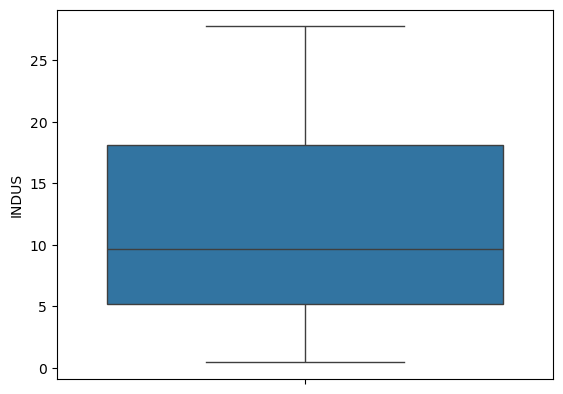

In [19]:
sns.boxplot(df['INDUS'])

In [23]:
df['INDUS'].quantile(0.75), df['INDUS'].quantile(0.25)

(18.1, 5.19)

### 4. Encoding Categorical Data
    - Manual Mapping : Less unique values, need manual supervision
    - One-Hot Encoding : Nominal Data
    - Label Encoding : Ordinal Data, No need to specify data (Not for linear models) 
    - Ordinal Encoding: Ordinal data, Specify data labelling
    
    - Target Encoding: denoted by the mean of the features we have given. [very riskful to use, can cause data leakage] 
    - Frequency Encoding: count of the values in column. [can be useless w. r. t. target]

In [33]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

In [34]:
df = pd.read_csv('adult.data', names=columns, na_values='?', skipinitialspace=True)

In [35]:
df.info()
# null values are handled here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [37]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [30]:
lis = list(df.select_dtypes(include=['object']).columns)
lis

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [31]:
for i in lis:
    print(i, df[i].unique(), '\n\n')

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 


education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 


marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 


occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 


relationship ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 


race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 


sex ['Male' 'Female'] 


native-country ['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras

#### 1: Manual mapping

In [92]:
mapping = {'Male': 0, 'Female':1}
df['sex'] = df['sex'].map(mapping)

In [93]:
mapping = {'<=50K': 0, '>50K':1}
df['income'] = df['income'].map(mapping)

#### 2: One-Hot Encoding

In [95]:
from sklearn.preprocessing import OneHotEncoder

In [96]:
ohe = OneHotEncoder()

In [100]:
df_frame = ohe.fit_transform(df[['marital-status']]).toarray()
df_frame = pd.DataFrame(df_frame, columns = ohe.get_feature_names_out(['marital-status']))

In [101]:
df = pd.concat([df.drop('marital-status', axis=1),df_frame], axis=1)

 2nd method to do one hot encoding

In [97]:
df_frame = pd.get_dummies(df['workclass'], prefix='workclass')

In [99]:
df = pd.concat([df.drop('workclass', axis=1),df_frame], axis=1)

#### 3: Label Encoding

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [103]:
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])

#### 4: Ordinal Labeling

In [104]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Preschool','1st-4th','5th-6th','7th-8th', '9th', '10th', '11th','12th','HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors','Masters', 'Prof-school','Doctorate']])

In [105]:
df['education'] = oe.fit_transform(df[['education']])

#### 5: Target Encoding : This can cause data leakage [our target here is 'income']

In [106]:
mean_map = df.groupby('occupation')['income'].mean()
df['occupation'] = df['occupation'].map(mean_map)

#### 6. Frequency Encoding: This do not have any relation with the target

In [107]:
freq_map = df['native-country'].value_counts()
df['native-country'] = df['native-country'].map(freq_map)

## 5. Feature Scaling
    - MinMaxScaling: When distribution is uneven, should be no outliers in data
    - StandardScaler: When distibution is Normal/Gaussian, should be no outliers in data
    - RobustScaler: When extreme outliers are present..........[ not for distance based model]
    - log1p + another scaler : When data is skewed [right skewed], but not extreme outliers

In [25]:
df = pd.read_csv('Wine.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [27]:
df['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

Intial check for the distribution of the variables is important

In [30]:
df['Alcohol'].min(), df['Alcohol'].max()

(11.03, 14.83)

<Axes: xlabel='Alcohol', ylabel='Count'>

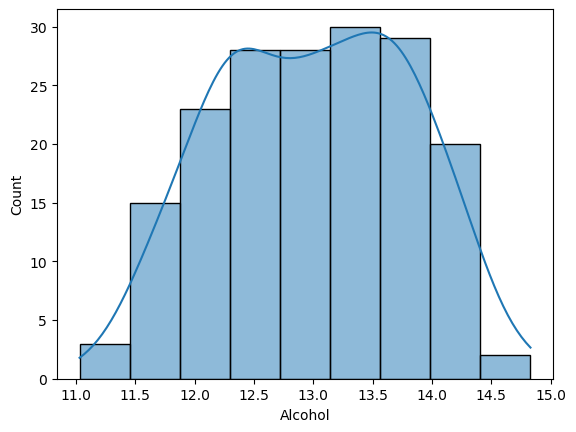

In [32]:
sns.histplot(df['Alcohol'], kde=True)

In [155]:
df['Magnesium'].skew()

0.6057231291674829

<Axes: ylabel='Magnesium'>

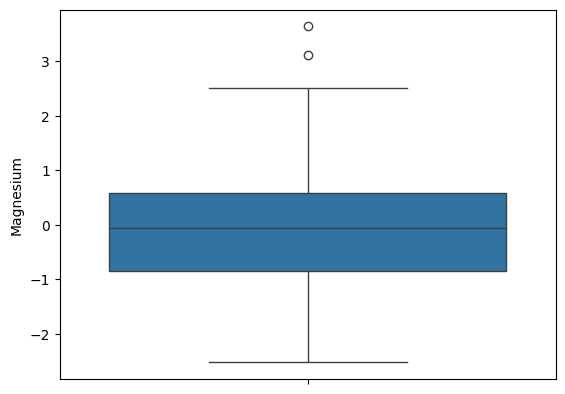

In [156]:
sns.boxplot(df['Magnesium'])

#### 1: MinMaxScaling : need to remove the outliers

In [132]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [133]:
df['Total_Phenols'] = ms.fit_transform(df[['Total_Phenols']])

In [134]:
df['Flavanoids'] = ms.fit_transform(df[['Flavanoids']])

In [135]:
df['Nonflavanoid_Phenols'] = ms.fit_transform(df[['Nonflavanoid_Phenols']])

In [136]:
df['OD280'] = ms.fit_transform(df[['OD280']])

#### 2. Standard Scaling : need to remove outliers

In [137]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [138]:
# no outliers
df.Alcohol = ss.fit_transform(df[['Alcohol']])

In [139]:
# outliers dont seem to be errorsome
df.Ash = ss.fit_transform(df[['Ash']])
df['Ash_Alcanity'] = ss.fit_transform(df[['Ash_Alcanity']])
df['Proanthocyanins'] = ss.fit_transform(df[['Proanthocyanins']])
df['Proline'] = ss.fit(df[['Proline']])

#### 3. RobustScaler

In [140]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [141]:
df['Color_Intensity'] = rs.fit_transform(df[['Color_Intensity']])

In [145]:
df['Hue'] = rs.fit_transform(df[['Hue']])

#### 4. log1p + another scaler

In [149]:
df.Malic_Acid = np.log1p(df.Malic_Acid)
df.Malic_Acid = rs.fit_transform(df[['Malic_Acid']])

In [150]:
df.Magnesium = np.log1p(df.Magnesium)
df.Magnesium = ss.fit_transform(df[['Magnesium']])

## 6. Final Outliers Check
    [ Same as step 03 ]

## 7. PCA and LDA
    - Principle Component Analysis: Unlabelled 
    - Linear Discriminant Analysis: Labelled
    - t-SNE/UMAP: Only to visualize the into 2d/3d. and UMAP is rarely used for transform.
    - Auto Encoders: Uses Neural Networks to shrink the dataset

In [44]:
df = pd.read_csv('Iris.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
df = df.set_index('Id')

Initial Check of Features

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

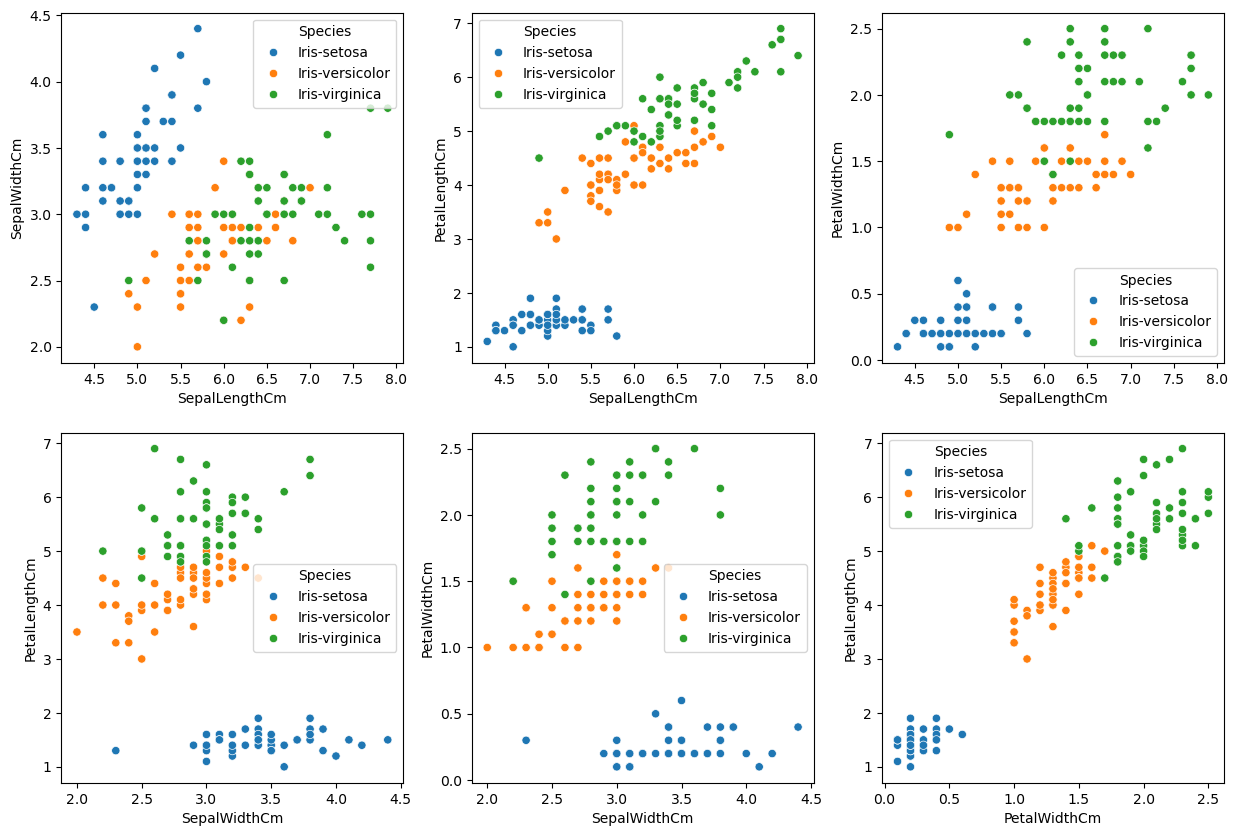

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue=df['Species'])
plt.subplot(2,3,2)
sns.scatterplot(x=df['SepalLengthCm'], y=df['PetalLengthCm'],hue=df['Species'])
plt.subplot(2,3,3)
sns.scatterplot(x=df['SepalLengthCm'],y=df['PetalWidthCm'],hue=df['Species'])
plt.subplot(2,3,4)
sns.scatterplot(x=df['SepalWidthCm'],y=df['PetalLengthCm'],hue=df['Species'])
plt.subplot(2,3,5)
sns.scatterplot(x=df['SepalWidthCm'],y=df['PetalWidthCm'],hue=df['Species'])
plt.subplot(2,3,6)
sns.scatterplot(x=df['PetalWidthCm'], y=df['PetalLengthCm'],hue=df['Species'])

In [48]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [49]:
X = df.iloc[:,:-1]
X = ss.fit_transform(X)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [51]:
X_pca = pca.fit_transform(X)
X_pca

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

<Axes: >

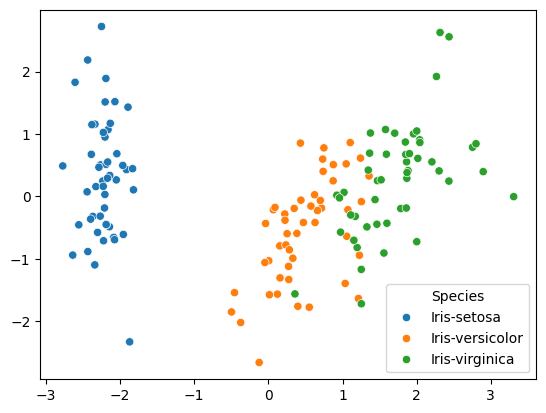

In [52]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Species'])

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [45]:
ld = LDA(n_components=2)

In [51]:
X_lda = ld.fit_transform(X, df.iloc[:,-1].values)

<Axes: >

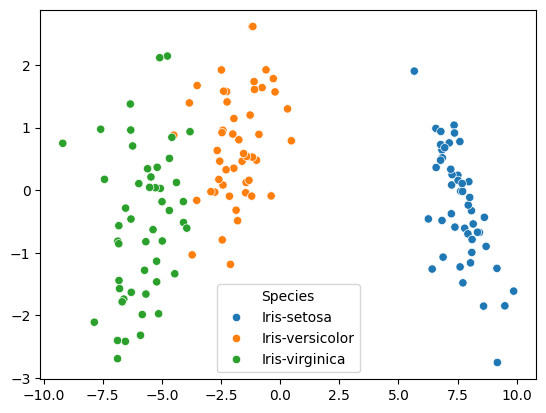

In [53]:
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=df['Species'])

## 8. Date and Time Feature Engineering
    - ** Basic Extraction (day[date], month, year, weekday, hour, is_month_start)
    - categorical bucketing (like mapping time stamps to time of day, seasons)
    - ** elasped time
    - ** cyclic encoding
    - ** lag features
    - aggregations
    - epoch timestamp

## 9. Exploratory Data Analysis
    - It focuses Structure, Quality, Relationship and Pattern.
    - Understanding Feature-Target Relationship
        Numerical feature:
            Regression: Scatterplot
            Classification: Boxplot
        Categorical feature: Barplot
    - Understanding Feature-Feature Relationship
        heatmap: to remove or PCA redundant data

   *Note*: if there is multicollinearity, use VIF for checking. 

In [3]:
df = pd.read_csv('data_files/titanic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df[['survived','pclass','age', 'sibsp','parch','fare']].corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Inferences
1. *pclass* and *fare* are moderately correlated to *survival target*, hence they can be used to show pattern
2. *pclass* and *fare* shows signs of multicollinearity.
3. *age* with *pclass* and *sibsp* shows acceptable multicollinearity.
4. *sibsp* with *parch* are multicollinear

<Axes: >

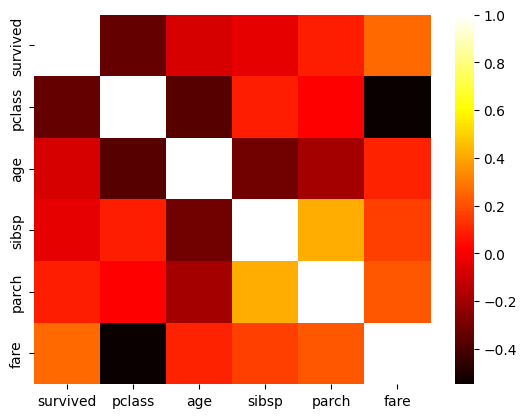

In [9]:
sns.heatmap(df[['survived','pclass','age', 'sibsp','parch','fare']].corr(), cmap='hot')

## 10. Feature Engineering
    - Creating New Features that might help
    - Ratios, counts, aggregates
    - Domain specific Insights
    - Interaction Features
*Note: This part specifically depends on analyst and domain of the dataset.*

## 11. Feature Selection
    - Remove redundant columns
    - Mutual Information (capture non-linear relationship)
    - Wrapper Methods
        - forward selection (optional)
        - backward selection (optional)
        - recursive feature elimination
    - Models
        - Lasso
        - Tree Based (Random Forest)
        - XGBoost
    - SelectKBest

In [22]:
df = pd.read_csv('data_files/breast-cancer.csv')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### 1. Check for multicollinearity > threshold (0.85) and remove such if needed

In [70]:
corr_matrix = df.select_dtypes(exclude=['object']).corr().abs()

In [71]:
for i in range(len(corr_matrix)):
    corr_matrix.iloc[i,i] = 0

In [72]:
high_corr_features = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.85)]

In [73]:
for i in high_corr_features:
    print(i)

radius_mean
texture_mean
perimeter_mean
area_mean
compactness_mean
concavity_mean
concave points_mean
radius_se
perimeter_se
area_se
radius_worst
texture_worst
perimeter_worst
area_worst
compactness_worst
concavity_worst
concave points_worst


## can remove any out of these, but not wwithout complete evaluation

#### 2. Mutual Information 

In [85]:
from sklearn.feature_selection import mutual_info_classif

In [88]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']
mi_scores = mutual_info_classif(X,y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

In [89]:
mi_series

perimeter_worst            0.475855
area_worst                 0.464925
radius_worst               0.452381
concave points_mean        0.440935
concave points_worst       0.437679
perimeter_mean             0.403939
concavity_mean             0.372349
radius_mean                0.368702
area_mean                  0.361365
area_se                    0.339412
concavity_worst            0.315517
perimeter_se               0.276984
radius_se                  0.247141
compactness_worst          0.226470
compactness_mean           0.210852
concave points_se          0.126459
texture_worst              0.118905
concavity_se               0.115067
smoothness_worst           0.096673
texture_mean               0.096375
symmetry_worst             0.091516
smoothness_mean            0.076979
compactness_se             0.075869
fractal_dimension_worst    0.067106
symmetry_mean              0.061624
fractal_dimension_se       0.037809
smoothness_se              0.016873
symmetry_se                0

## These are top columns to choose for moodel

#### 3. RFE

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [100]:
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=5)
rfe.fit(X, y)

,estimator,LogisticRegre...ax_iter=10000)
,n_features_to_select,5
,step,1
,verbose,0
,importance_getter,'auto'
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1


In [101]:
selected = X.columns[rfe.support_]

In [102]:
selected

Index(['radius_mean', 'texture_se', 'radius_worst', 'compactness_worst',
       'concavity_worst'],
      dtype='object')

#### 4. Models Based

## Understand during models learning

#### 5. SelectKBest

In [103]:
from sklearn.feature_selection import SelectKBest, f_classif

In [104]:
selector = SelectKBest(score_func=f_classif, k=5)  # or mutual_info_classif
X_new = selector.fit_transform(X, y)

In [105]:
selected_features = X.columns[selector.get_support()]
selected_features

Index(['perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'concave points_worst'],
      dtype='object')

## 12. Data imbalance
    - check value counts
    - handling:
        - Resampling (random sampling, SMOT)
        - Undersampling
        - make model balanced or ensemble

In [110]:
df['diagnosis'].value_counts(normalize=True)*100

diagnosis
1    62.741652
0    37.258348
Name: proportion, dtype: float64

In [113]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()

## 13. Splitting the data

In [114]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [115]:
data = load_breast_cancer()
X, y = data.data, data.target

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
model = RandomForestClassifier(random_state=42)

In [120]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [122]:
cv_scores

array([0.96703297, 0.98901099, 0.92307692, 0.93406593, 0.95604396])